In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltABC
import seaborn as sns

In [3]:
# File to Load 
city_data_load = "raw_data/city_data.csv"
ride_data_load = "raw_data/ride_data.csv"

city_data = pd.read_csv(city_data_load)
ride_data = pd.read_csv(ride_data_load)

pyber_data = pd.merge(ride_data, city_data, how="left", on=["city"])

pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
def color(row):
    type_ = row['type']
    if type_=='Urban':
        color = 'Red'
    if type_=='Rural':
        color = 'Blue'
    if type_=='Suburban':
        color = 'Green'
    return color
pyber_data['color'] = pyber_data.apply(color, axis=1)

In [26]:
pyber_data.head()

,city,date,fare,ride_id,driver_count,type,color
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,Red
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,Red
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,Red
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,Red
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,Red


In [27]:
city_counts = pyber_data["city"].value_counts()
city_counts.head()

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
Name: city, dtype: int64

In [28]:
pyber_data[(pyber_data.city=='Amandaburgh') & (pyber_data.type=='Urban')].fare.mean()

24.641666666666666

In [29]:
pyber_data[pyber_data.city=='Erikaland'].fare.mean()

24.906666666666666

In [30]:
pyber_data.sort_values('fare').head()

,city,date,fare,ride_id,driver_count,type,color
634,North Barbara,2018-03-24 06:49:11,4.05,5344060775757,18,Urban,Red
714,West Josephberg,2018-02-19 20:48:16,4.07,1348027294873,45,Urban,Red
838,Erikaland,2018-03-24 09:50:04,4.07,6561682951720,37,Urban,Red
734,Royland,2018-01-15 08:50:46,4.10,9409233443225,64,Urban,Red
910,Reynoldsfurt,2018-03-10 20:10:03,4.10,5690725376594,67,Urban,Red


In [31]:
grouped_city_df = pyber_data.groupby(['city',"type"])
print(grouped_city_df)
grouped_city_df.count().head(10)

,,date,fare,ride_id,driver_count,color
city,type,,,,,
Amandaburgh,Urban,18,18,18,18,18
Barajasview,Urban,22,22,22,22,22
Barronchester,Suburban,16,16,16,16,16
Bethanyland,Suburban,18,18,18,18,18
Bradshawfurt,Rural,10,10,10,10,10
Brandonfort,Suburban,19,19,19,19,19
Carriemouth,Urban,27,27,27,27,27
Christopherfurt,Urban,27,27,27,27,27
Colemanland,Suburban,22,22,22,22,22


In [32]:
city_avg_fare = grouped_city_df["fare"].mean()
city_avg_fare.head()

city           type    
Amandaburgh    Urban       24.641667
Barajasview    Urban       25.332273
Barronchester  Suburban    36.422500
Bethanyland    Suburban    32.956111
Bradshawfurt   Rural       40.064000
Name: fare, dtype: float64

In [33]:
city_total_rides = grouped_city_df["ride_id"].count()
city_total_rides.head()

city           type    
Amandaburgh    Urban       18
Barajasview    Urban       22
Barronchester  Suburban    16
Bethanyland    Suburban    18
Bradshawfurt   Rural       10
Name: ride_id, dtype: int64

In [34]:
city_driver_count = grouped_city_df["driver_count"].mean()
city_driver_count.head()

city           type    
Amandaburgh    Urban       12
Barajasview    Urban       26
Barronchester  Suburban    11
Bethanyland    Suburban    22
Bradshawfurt   Rural        7
Name: driver_count, dtype: int64

In [35]:
city_final_df = pd.DataFrame({"Average Fare": city_avg_fare,
                             "Rides Per City":city_total_rides,
                             "Driver Count":city_driver_count})
city_final_df.head()

,,Average Fare,Driver Count,Rides Per City
city,type,,,
Amandaburgh,Urban,24.641667,12,18
Barajasview,Urban,25.332273,26,22
Barronchester,Suburban,36.422500,11,16
Bethanyland,Suburban,32.956111,22,18
Bradshawfurt,Rural,40.064000,7,10


In [36]:
city_final_df.sort_values('Average Fare').head()

,,Average Fare,Driver Count,Rides Per City
city,type,,,
South Latoya,Urban,20.093158,10,19
West Gabriel,Urban,20.346087,57,23
Royland,Urban,20.570667,64,30
Leahton,Urban,21.243810,17,21
Raymondhaven,Urban,21.480400,11,25


In [63]:
city_final_df.iloc[0]

Average Fare      24.641667
Driver Count      12.000000
Rides Per City    18.000000
Name: (Amandaburgh, Urban), dtype: float64

In [44]:
len(city_color)

2375

<IPython.core.display.Javascript object>


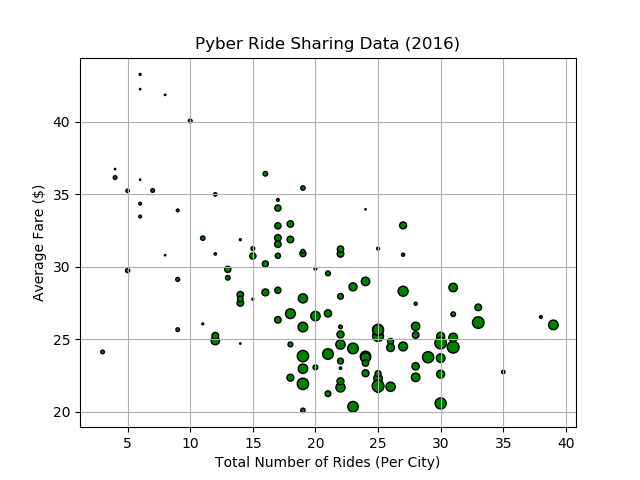

In [61]:
#type_map = ["Urban","Suburban","Rural"]
plt.scatter(city_total_rides, city_avg_fare, city_driver_count, marker="o", facecolors="LightCoral", edgecolors="black", color = ['blue']*120)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

x=city_total_rides
y=city_avg_fare
plt.grid()

plt.show()
plt.savefig("Pyber.png")

In [16]:
checkrodneyfort = pyber_data.loc[pyber_data["city"] == "Amandaburgh", :]
print(len(checkrodneyfort))

18


In [17]:
pyber_data["ride_id"].count()

2375

In [18]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [19]:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

group_type_df = pyber_data.groupby(["type"])
Total_fare = group_type_df["fare"].sum()
Total_rides = group_type_df["ride_id"].count()


Total_drivers = city_data.groupby("type")["driver_count"].sum()
print(Total_drivers)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [20]:
# colors = ["blue", "yellow","lightcoral"]
# explode = (0.05, 0, 0)
# labels = ["Rural", "Urban", "Suburban"]

# pltABC.title("% of Total Fares by City Type")
# pltABC.pie(Total_fare, autopct="%1.1f%%", explode=explode, colors= colors, labels = labels,
#         shadow=True, startangle=90)
# pltABC.axis("equal")
# pltABC.show()

In [21]:
# colors = ["blue", "yellow","lightcoral"]
# explode = (0.05, 0, 0)
# labels = ["Rural", "Urban", "Suburban"]

# pltABC.title("% of Total Drivers by City Type")
# pltABC.pie(Total_fare, autopct="%1.1f%%", explode=explode, colors= colors, labels = labels,
#         shadow=True, startangle=90)
# pltABC.axis("equal")
# pltABC.show()
    

In [22]:
# Analysis

# Majority of drivers undertake ride sharing between $20 and $30 price range
# Strategy can be adapted to attract more drivers for a higher fare > $30.


In [ ]:
3 scatter plot
then

plot.show